In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [8]:
# Import the requessts library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=" + weather_api_key
print(url)

https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=e452c6a40fb8bbe35037d826fecc24ff


In [10]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval      
------------------------------


In [13]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Processing Record 1 of Set 2 | harper
Processing Record 2 of Set 2 | bonthe
Processing Record 3 of Set 2 | dingle
Processing Record 4 of Set 2 | bredasdorp
Processing Record 5 of Set 2 | iqaluit
Processing Record 6 of Set 2 | saint george
Processing Record 7 of Set 2 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 2 | dikson
Processing Record 9 of Set 2 | vredendal
Processing Record 10 of Set 2 | jamestown
Processing Record 11 of Set 2 | bambous virieux
Processing Record 12 of Set 2 | ushuaia
Processing Record 13 of Set 2 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 2 | muros
Processing Record 15 of Set 2 | port alfred
Processing Record 16 of Set 2 | pontarlier
Processing Record 17 of Set 2 | mahebourg
Processing Record 18 of Set 2 | marovoay
Processing Record 19 of Set 2 | cidreira
Processing Record 20 of Set 2 | ponta do sol
Processing Record 21 of Set 2 | skagastrond
City not found. Skipping...
Processing Record 22 of Set 2 | belushya

Processing Record 41 of Set 5 | belmonte
Processing Record 42 of Set 5 | hamilton
Processing Record 43 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 5 | cap malheureux
Processing Record 45 of Set 5 | grindavik
Processing Record 46 of Set 5 | kirzhach
Processing Record 47 of Set 5 | sao joao da barra
Processing Record 48 of Set 5 | oriximina
Processing Record 49 of Set 5 | tshikapa
Processing Record 50 of Set 5 | oksfjord
Processing Record 1 of Set 6 | padang
Processing Record 2 of Set 6 | neon petritsion
Processing Record 3 of Set 6 | gemena
Processing Record 4 of Set 6 | bodden town
Processing Record 5 of Set 6 | inhambane
Processing Record 6 of Set 6 | severnyy
Processing Record 7 of Set 6 | tumannyy
City not found. Skipping...
Processing Record 8 of Set 6 | taoudenni
Processing Record 9 of Set 6 | chongwe
Processing Record 10 of Set 6 | blagoyevo
Processing Record 11 of Set 6 | qaqortoq
Processing Record 12 of Set 6 | salalah
Processing Re

Processing Record 35 of Set 9 | mecca
Processing Record 36 of Set 9 | cozumel
Processing Record 37 of Set 9 | lerwick
Processing Record 38 of Set 9 | alvaraes
Processing Record 39 of Set 9 | sosua
Processing Record 40 of Set 9 | nouadhibou
Processing Record 41 of Set 9 | kortkeros
Processing Record 42 of Set 9 | sabla
Processing Record 43 of Set 9 | bokoro
Processing Record 44 of Set 9 | vestmanna
Processing Record 45 of Set 9 | potiskum
Processing Record 46 of Set 9 | talbahat
Processing Record 47 of Set 9 | potosi
Processing Record 48 of Set 9 | jaciara
Processing Record 49 of Set 9 | skjervoy
Processing Record 50 of Set 9 | krasnoselkup
Processing Record 1 of Set 10 | neka
Processing Record 2 of Set 10 | iberia
Processing Record 3 of Set 10 | karwar
Processing Record 4 of Set 10 | ambovombe
Processing Record 5 of Set 10 | tarauaca
Processing Record 6 of Set 10 | lasa
Processing Record 7 of Set 10 | kayerkan
Processing Record 8 of Set 10 | honningsvag
Processing Record 9 of Set 10 | 

Processing Record 23 of Set 13 | toamasina
Processing Record 24 of Set 13 | brigantine
Processing Record 25 of Set 13 | porto velho
Processing Record 26 of Set 13 | sambava
Processing Record 27 of Set 13 | jeremoabo
Processing Record 28 of Set 13 | horta
Processing Record 29 of Set 13 | tvoroyri
Processing Record 30 of Set 13 | beziers
Processing Record 31 of Set 13 | opobo
City not found. Skipping...
Processing Record 32 of Set 13 | guarapari
Processing Record 33 of Set 13 | alhaurin de la torre
Processing Record 34 of Set 13 | beni suef
Processing Record 35 of Set 13 | port-cartier
Processing Record 36 of Set 13 | filadelfia
Processing Record 37 of Set 13 | sarmanovo
Processing Record 38 of Set 13 | trairi
Processing Record 39 of Set 13 | mikhaylovka
Processing Record 40 of Set 13 | sovetskiy
Processing Record 41 of Set 13 | grand-santi
Processing Record 42 of Set 13 | burica
City not found. Skipping...
Processing Record 43 of Set 13 | karatau
Processing Record 44 of Set 13 | agapovk

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Harper,4.3750,-7.7169,300.48,83,100,3.72,LR,2022-04-04 22:38:51
1,Bonthe,7.5264,-12.5050,298.13,80,63,2.33,SL,2022-04-04 22:38:51
2,Dingle,10.9995,122.6711,297.76,90,100,3.47,PH,2022-04-04 22:28:40
3,Bredasdorp,-34.5322,20.0403,288.99,78,17,3.63,ZA,2022-04-04 22:31:34
4,Iqaluit,63.7506,-68.5145,262.00,73,75,9.77,CA,2022-04-04 22:35:46
5,Saint George,37.1041,-113.5841,298.95,15,0,7.72,US,2022-04-04 22:30:35
6,Dikson,73.5069,80.5464,256.97,86,55,6.30,RU,2022-04-04 22:31:47
7,Vredendal,-31.6683,18.5012,288.52,89,1,1.89,ZA,2022-04-04 22:34:24
8,Jamestown,42.0970,-79.2353,280.11,47,100,3.09,US,2022-04-04 22:30:18
9,Bambous Virieux,-20.3428,57.7575,299.29,89,40,3.09,MU,2022-04-04 22:35:39


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Harper,LR,2022-04-04 22:38:51,4.3750,-7.7169,300.48,83,100,3.72
1,Bonthe,SL,2022-04-04 22:38:51,7.5264,-12.5050,298.13,80,63,2.33
2,Dingle,PH,2022-04-04 22:28:40,10.9995,122.6711,297.76,90,100,3.47
3,Bredasdorp,ZA,2022-04-04 22:31:34,-34.5322,20.0403,288.99,78,17,3.63
4,Iqaluit,CA,2022-04-04 22:35:46,63.7506,-68.5145,262.00,73,75,9.77


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

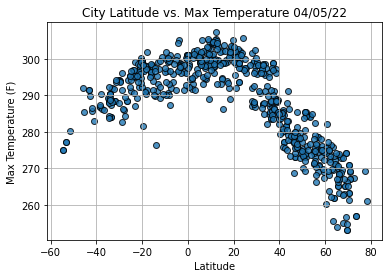

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../weather_data/Fig1.png")

# Show plot.
plt.show()

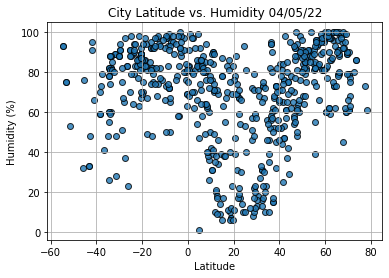

In [25]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../weather_data/Fig2.png")

# Show plot.
plt.show()

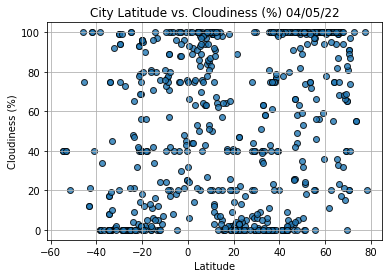

In [26]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../weather_data/Fig3.png")

# Show plot.
plt.show()

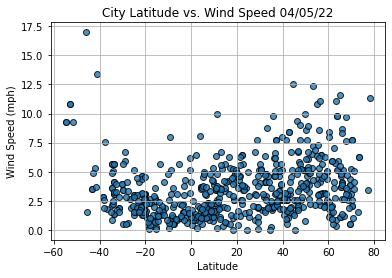

In [27]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../weather_data/Fig4.png")

# Show plot.
plt.show()